In [175]:
import numpy as np

In [176]:
import pandas as pd
import os
from glob import glob
pd.set_option('display.max_rows', 500)

# Uploading CSV of results
data_entries = pd.read_csv('data_entries.csv')
data_entries = data_entries.drop(columns=['Patient Gender', 'Patient Age', 'View Position', 'Follow-up #', 'OriginalImagePixelSpacing[x', 'y]','OriginalImage[Width', 'Height]'])

# Setting image paths in dataframe
image_paths = {os.path.basename(x): x for x in glob('..\dataset\images*\images\*.png')}
data_entries['path'] = data_entries['Image Index'].map(image_paths.get)
data_entries

,Image Index,Finding Labels,Patient ID,path
0,00000001_000.png,Cardiomegaly,1,..\dataset\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,..\dataset\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,1,..\dataset\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,2,..\dataset\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,3,..\dataset\images_001\images\00000003_000.png
...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,30801,..\dataset\images_012\images\00030801_001.png
112116,00030802_000.png,No Finding,30802,..\dataset\images_012\images\00030802_000.png
112117,00030803_000.png,No Finding,30803,..\dataset\images_012\images\00030803_000.png
112118,00030804_000.png,No Finding,30804,..\dataset\images_012\images\00030804_000.png


In [177]:
# Simplifying findings column
def common_findings(findings):
    findings_list = findings.split('|')
    for i, val in enumerate(findings_list):
        if val == 'Nodule':
            findings_list[i] = 'Mass'
        elif val == 'Infiltration' or val == 'Pneumonia':
            findings_list[i] = 'Consolidation'
    findings_list = list(set(findings_list))
    final_findings = ''
    for finding in findings_list:
        final_findings += finding + '|'
    if final_findings[-1] == '|':
        final_findings = final_findings[:-1]
    return final_findings

data_entries['Finding Labels'] = data_entries['Finding Labels'].apply(common_findings)

# Columns for each finding
new_col_names = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']
for name in new_col_names:
    data_entries[name] = data_entries['Finding Labels'].map(lambda result: 1.0 if name in result else 0)

data_entries['findings_list'] = data_entries.apply(lambda target: [target[new_col_names].values], 1).map(lambda target: target[0])

data_entries

,Image Index,Finding Labels,Patient ID,path,Mass,Consolidation,Atelectasis,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pleural_Thickening,Cardiomegaly,Hernia,findings_list
0,00000001_000.png,Cardiomegaly,1,..\dataset\images_001\images\00000001_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00000001_001.png,Cardiomegaly|Emphysema,1,..\dataset\images_001\images\00000001_001.png,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,00000001_002.png,Cardiomegaly|Effusion,1,..\dataset\images_001\images\00000001_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
3,00000002_000.png,No Finding,2,..\dataset\images_001\images\00000002_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,00000003_000.png,Hernia,3,..\dataset\images_001\images\00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Consolidation,30801,..\dataset\images_012\images\00030801_001.png,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
112116,00030802_000.png,No Finding,30802,..\dataset\images_012\images\00030802_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
112117,00030803_000.png,No Finding,30803,..\dataset\images_012\images\00030803_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
112118,00030804_000.png,No Finding,30804,..\dataset\images_012\images\00030804_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


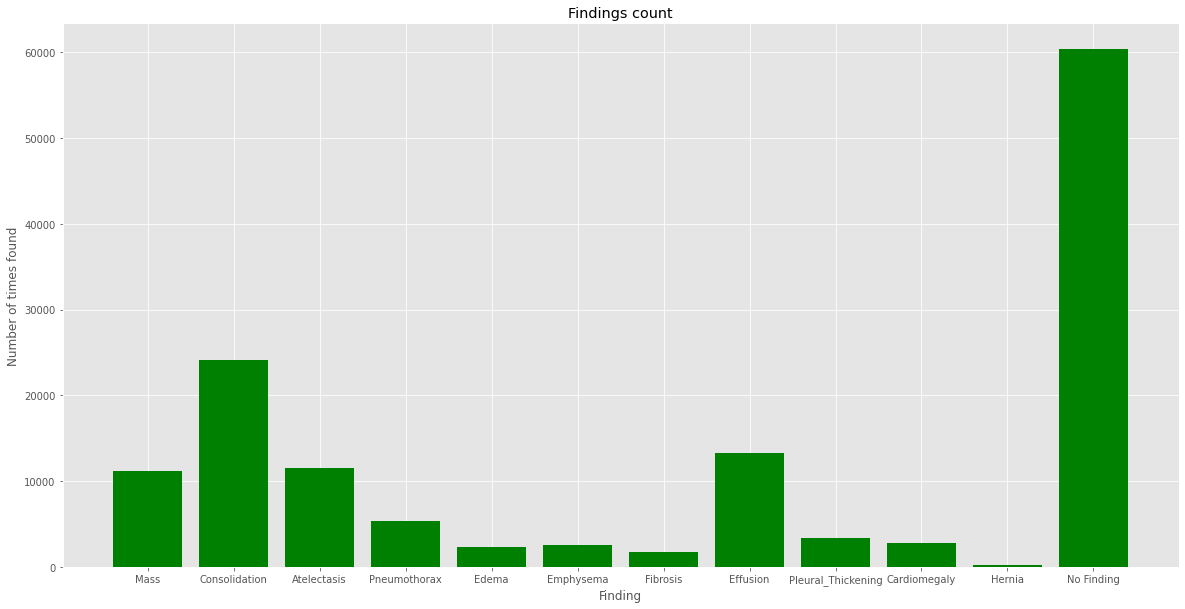

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Checking for data imbalance
x = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia', 'No Finding']
findings_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x_pos = [i for i, _ in enumerate(x)]

def count_findings(findings):
    findings_list = findings.split('|')
    for finding in findings_list:
        for i in range(0, len(x)):
            if finding == x[i]:
                findings_count[i] += 1
                break

data_entries['Finding Labels'].apply(count_findings)

plt.bar(x_pos, findings_count, color='green')
plt.xlabel('Finding')
plt.ylabel('Number of times found')
plt.title('Findings count')
plt.xticks(x_pos, x)
plt.show()

In [179]:
# TODO: Potential data leakage?
from sklearn.model_selection import train_test_split
train_and_test_set, val_set = train_test_split(data_entries, train_size=0.8, test_size=0.2, random_state=1111)
train_set, test_set = train_test_split(train_and_test_set, train_size=0.75, test_size=0.25, random_state=1111)

print(len(train_set))
print(len(val_set))
print(len(test_set))

67272
22424
22424


In [180]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image pre-processing
# TODO: tweak values?
data_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

# Generate batches from entries
dataframe_generator = data_generator.flow_from_dataframe(dataframe=data_entries, directory='', x_col='path', )

KeyError: 'class'